# chapter 9: Representations for machine learning

# <center> ![picture](pictures/title.jpg)


Linear regression and classification, while powerful, may initially appear limited in their application to real-world problems. The assumption that the target variable is a linear combination of features might not always hold. However, the scope of linear regression can be expanded by applying non-linear transformations to the data matrix, allowing for non-linear fitting. The key challenge is to derive useful feature representations, a fundamental problem in machine learning.

## 9.1 Radial Basis Function Networks and Kernel Representation

Radial Basis Function (RBF) networks offer a natural extension of polynomial curve fitting. By selecting points as "centers" in the input space, these centers act as basis functions. The choice of centers, whether from the dataset or determined through clustering techniques like K-means, influences the network's performance.

For Gaussian mixture model-based clustering, the basis functions can be defined as follows:

$$[ \varphi_j(\mathbf{x}) = e^{-\frac{1}{2}(\mathbf{x} - \mathbf{c}_j)^T \Sigma_j^{-1} (\mathbf{x} - \mathbf{c}_j)} ]$$

When K-means or other clustering methods are used:

$$[ \varphi_j(x) = e^{-\frac{||x - c_j||^2}{2\sigma_j^2}} ]$$

These basis functions can be represented as a matrix $(\mathbf{\Phi})$, and the prediction for a given input $(\mathbf{x})$ is calculated as:

$$[ f(\mathbf{x}) = \sum_{j=0}^{p} \mathcal{w}_j \varphi_j(\mathbf{x}) ]$$

RBF networks, depicted in Figure 9.1, can be viewed as neural networks with the potential to approximate any function accurately with a sufficient number of radial basis functions.

## 9.2 Learning Representations

Representation learning is a crucial aspect of machine learning, and two dominant approaches are (semi-supervised) matrix factorization techniques and neural networks.

### 9.2.1 Neural Networks

Neural networks, a form of supervised representational learning, aim to learn a function $(f)$ that maps inputs to predictions. The introduction of hidden layers with non-linear activation functions facilitates the learning of complex, non-linear functions.

In a standard two-layer neural network (Figure 9.3), the input features $((\mathbf{x}))$ are transformed through a hidden layer to produce a new representation $((\mathbf{h}))$. The final layer corresponds to supervised prediction. The weights associated with these transformations determine the network's ability to capture intricate relationships in the data.

For a given input vector $(\mathbf{x} = [x_1, x_2, x_3, x_4])$ and a 2D prediction $(\mathbf{y} = [y_1, y_2])$, the hidden layer generates a 5-dimensional representation $((\mathbf{h}))$. Each node in this hidden layer $((h_k))$ is computed as:

$$[ h_k = \sigma\left(\sum_{j=1}^{d}(x_j w_{kj})\right) ]$$

Here, $(w_{kj})$ represents the weights associated with the transformation. The neural network learns these weights during training to optimize the prediction.

### Backpropagation Algorithm

Training a neural network involves optimizing its parameters using an algorithm called backpropagation. This algorithm iteratively adjusts the weights to minimize the error between predicted and actual outputs.

Starting with a single sample $((\mathbf{x}, \mathbf{y}))$, the backpropagation algorithm computes the gradient of the error with respect to the parameters. It does this in two steps: first for the weights connecting the output layer $((\mathbf{W}^{(1)}))$ and then for the weights connecting the hidden layer to the output layer $((\mathbf{W}^{(2)}))$.

The gradient for $(\mathbf{W}^{(1)})$ is calculated using the chain rule:

$$[ \frac{\partial Err(\mathbf{W}^{(1)}, \mathbf{W}^{(2)})}{\partial \mathbf{W}_{jk}^{(1)}} = (\hat{y}_k - \mathbf{y}_k) \mathbf{h}_j ]$$

This gradient is then used to update the weights: $(\mathbf{W}^{(1)} = \mathbf{W}^{(1)} - \alpha (\hat{y} - \mathbf{y}) \mathbf{h}^T)$, where $(\alpha)$ is the step size.

Next, the gradient for $(\mathbf{W}^{(2)})$ is computed, taking into account the contributions from each output:

$$[ \frac{\partial Err(\mathbf{W}^{(1)}, \mathbf{W}^{(2)})}{\partial \mathbf{W}_{ij}^{(2)}} = \sum_k (\hat{y}_k - \mathbf{y}_k) \mathbf{W}_{jk}^{(1)} \sigma'(\mathbf{h}_j) x_i ]$$

The weights $(\mathbf{W}^{(2)})$ are then updated in a similar manner.

The backpropagation algorithm is applied iteratively to the entire dataset until the model converges.

### 9.2.2 Autoencoders

Autoencoders are another representation learning technique that involves training a neural network to reproduce its input. They consist of an encoder, which maps the input to a hidden representation, and a decoder, which reconstructs the input from this representation.

Mathematically, the encoder function $(f_{\text{enc}})$ and the decoder function $(f_{\text{dec}})$ are defined as follows:

$$[ \mathbf{h} = f_{\text{enc}}(\mathbf{x}) = \sigma(\mathbf{W}_{\text{enc}} \mathbf{x} + \mathbf{b}_{\text{enc}}) ]$$

$$[ \mathbf{x}' = f_{\text{dec}}(\mathbf{h}) = \sigma(\mathbf{W}_{\text{dec}} \mathbf{h} + \mathbf{b}_{\text{dec}}) ]$$

The objective is to minimize the reconstruction error, typically measured as the mean squared error between the input and the output:

$$[ \text{MSE}(\mathbf{x}, \mathbf{x}') = \frac{1}{n} \sum_{i=1}^{n} (x_i - x_i')^2 ]$$

Autoencoders are trained using backpropagation, similar to other neural networks. Once trained, the encoder can be used to obtain a meaningful representation of the input data, potentially useful for downstream tasks.

## 9.3 Dimensionality Reduction

High-dimensional data can pose challenges in terms of computational efficiency and overfitting. Dimensionality reduction techniques aim to mitigate these issues by transforming the data into a lower-dimensional space while preserving relevant information.

### 9.3.1 Principal Component Analysis (PCA)

PCA is a widely used linear dimensionality reduction technique. It identifies the directions (principal components) in which the data varies the most and projects the data onto these components. The first principal component corresponds to the direction of maximum variance, and subsequent components are orthogonal to the previous ones.

Let $(\mathbf{X})$ be the data matrix with $(n)$ samples and $(d)$ features. The covariance matrix $(\mathbf{C})$ is given by:

$$[ \mathbf{C} = \frac{1}{n} \sum_{i=1}^{n} (\mathbf{x}_i - \mathbf{\mu})(\mathbf{x}_i - \mathbf{\mu})^T ]$$

where $(\mathbf{\mu})$ is the mean vector. The eigenvectors of $(\mathbf{C})$ correspond to the principal components, and the corresponding eigenvalues indicate the amount of variance explained by each component.

The projection of the data onto the first $(k)$ principal components is given by:

$$[ \mathbf{X}_{\text{proj}} = \mathbf{X} \mathbf{W}_k ]$$

where $(\mathbf{W}_k)$ contains the first $(k)$ eigenvectors as columns.

### 9.3.2 t-Distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE is a non-linear dimensionality reduction technique particularly effective for visualizing high-dimensional data in two or three dimensions. It focuses on preserving pairwise similarities between data points.

The algorithm defines a probability distribution over pairs of high-dimensional data points and a similar distribution over the low-dimensional counterparts. It then minimizes the divergence between these distributions. The t-SNE cost function is given by:

$$[ C = \sum_i KL(P_i || Q_i) = \sum_i \sum_j p_{ij} \log\frac{p_{ij}}{q_{ij}} ]$$

where $(P_i)$ and $(Q_i)$ are the conditional probability distributions in the high-dimensional and low-dimensional spaces, respectively, and $(p_{ij})$ and $(q_{ij})$ are the pairwise similarities.

t-SNE tends to preserve local structures in the data, making it useful for visualizing clusters.

## 9.4 Manifold Learning

Manifold learning is a class of techniques that aims to capture the intrinsic geometry of the data, especially when it lies on a lower-dimensional manifold within the high-dimensional space.

### 9.4.1 Isomap

Isomap (Isometric Mapping) is a manifold learning technique that focuses on preserving geodesic distances between all pairs of data points. It starts by constructing a neighborhood graph, where nodes represent data points and edges connect neighboring points. The geodesic distance between points is then approximated by the shortest path along the edges of this graph.

Isomap provides a low-dimensional embedding of the data while preserving its intrinsic geometry. However, it assumes that the data lies on a single, connected manifold.

### 9.4.2 Uniform Manifold Approximation and Projection (UMAP)

UMAP is a versatile manifold learning technique that balances preserving local and global structures in the data. It constructs a high-dimensional fuzzy topological representation of the data and optimizes a low-dimensional representation to mirror this topology.

UMAP is known for its ability to reveal complex structures in data, including clusters and hierarchies. It has become popular for visualizing high-dimensional data in a two-dimensional space.

## 9.5 Conclusion

Representations play a crucial role in machine learning, influencing the model's ability to capture complex patterns in the data. Whether using RBF networks, neural networks, autoencoders, or dimensionality reduction techniques like PCA and t-SNE, the choice of representation can significantly impact model performance.

Dimensionality reduction methods help in addressing the curse of dimensionality, making it easier to train models and visualize data. Manifold learning techniques, such as Isomap and UMAP, go a step further by aiming to capture the intrinsic structure of the data.

As the field of machine learning continues to evolve, the quest for effective and interpretable representations remains a central theme. Researchers and practitioners explore new methods to enhance the ability of models to learn from data, generalize to unseen examples, and provide meaningful insights.

In the next chapter, we will delve into advanced topics, including ensemble learning, deep learning, and the challenges and opportunities posed by real-world applications.

### Radial Basis Function (RBF) Networks

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


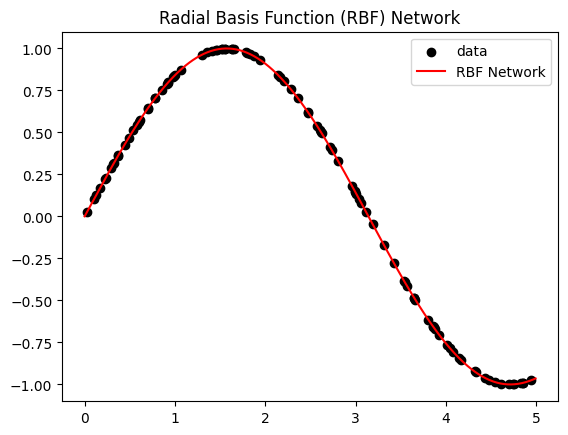

In [3]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()

# Apply K-means clustering to determine RBF centers
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X)
centers = kmeans.cluster_centers_

# Calculate RBF features
sigma = 1.0
phi = rbf_kernel(X, centers, gamma=1.0 / (2.0 * sigma ** 2))

# Fit linear regression on RBF features
model = LinearRegression()
model.fit(phi, y)

# Generate test data
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
phi_test = rbf_kernel(X_test, centers, gamma=1.0 / (2.0 * sigma ** 2))

# Predict using the RBF network
y_pred = model.predict(phi_test)

# Plot the results
plt.scatter(X, y, color='black', label='data')
plt.plot(X_test, y_pred, color='red', label='RBF Network')
plt.title('Radial Basis Function (RBF) Network')
plt.legend()
plt.show()


### Neural Networks with Backpropagation

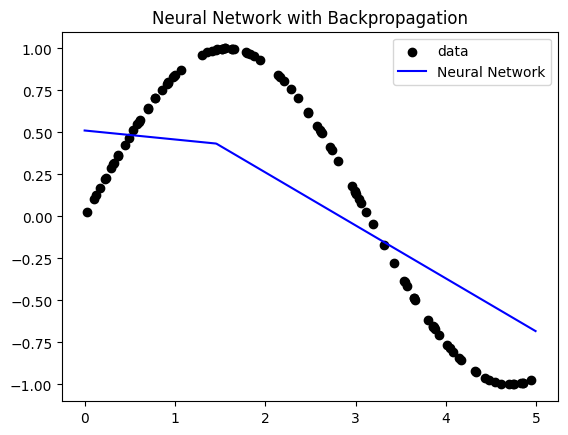

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# Generate synthetic data
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()

# Train a neural network
model = MLPRegressor(hidden_layer_sizes=(10,), max_iter=10000, random_state=42)
model.fit(X, y)

# Generate test data
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

# Predict using the neural network
y_pred = model.predict(X_test)

# Plot the results
plt.scatter(X, y, color='black', label='data')
plt.plot(X_test, y_pred, color='blue', label='Neural Network')
plt.title('Neural Network with Backpropagation')
plt.legend()
plt.show()


### Principal Component Analysis (PCA)

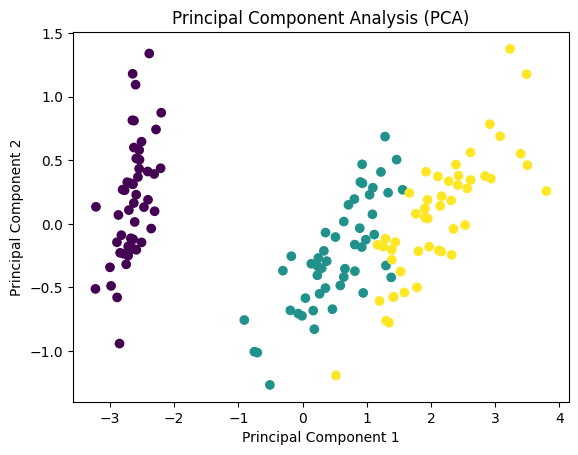

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('Principal Component Analysis (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


### t-Distributed Stochastic Neighbor Embedding (t-SNE)

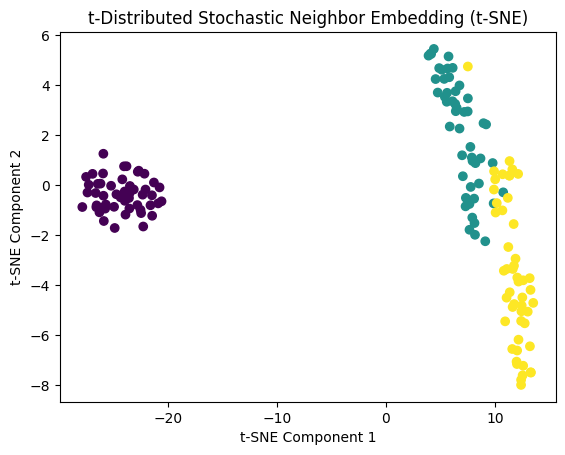

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the results
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title('t-Distributed Stochastic Neighbor Embedding (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


> This example visualizes the iris dataset in a 2D space using t-SNE.